# Orientations

The [pyfar.Orientations](https://pyfar.readthedocs.io/en/stable/classes/pyfar.orientations.html) class is designed for storing, manipulating, and accessing orientation vectors. Examples for this are orientations of directional loudspeakers during measurements or head orientations. 

An orientation can be visualized with the triple of view, up and right vectors and it is tied to the object’s local coordinate system. Alternatively the object's orientation can be illustrated with help of the right hand: Thumb (view), forefinger (up) and middle finger (right). This means that the right vector is not required to define a Orientation. Note define a valid Orientation, the view and up vector need to be orthogonal to each other.

Unfortunately, [scipy.spatial.transform.Rotation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html) is not able to deal with view and up vectors, thats why we extended this it.
In other words,  [pyfar.Orientations](https://pyfar.readthedocs.io/en/stable/classes/pyfar.orientations.html) is inherited from [scipy.spatial.transform.Rotation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html) and that all methods of this class can also be used with [pyfar.Orientations](https://pyfar.readthedocs.io/en/stable/classes/pyfar.orientations.html). And [pyfar.Orientations](https://pyfar.readthedocs.io/en/stable/classes/pyfar.orientations.html) can cover view and up vectors. 

In [1]:
import pyfar as pf
import numpy as np
%matplotlib inline

## Entering orientations

Lets go ahead and create an object and show the result. Note that the view an up vectors are always given in cartesian coordinates.

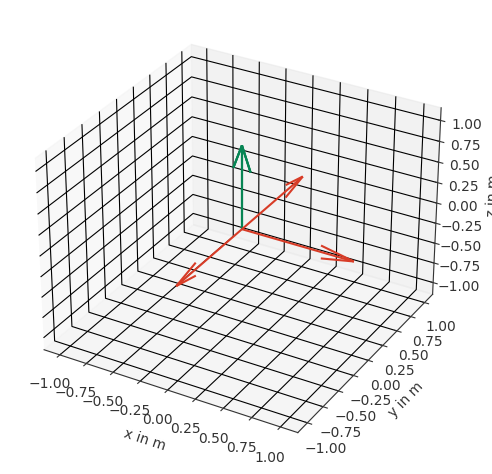

In [2]:
views = [[0,  1, 0],
         [1,  0, 0],
         [0, -1, 0]]
up = [0, 0, 1]
orientations = pf.Orientations.from_view_up(views, up)
orientations.show(show_rights=False)


It is also possible to enter [pyfar.Orientations](https://pyfar.readthedocs.io/en/stable/classes/pyfar.orientations.html) from [pyfar.Coordinates](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html) object or mixtures of [pyfar.Coordinates](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html) objects and array likes. This is equivalent to the example above

In [3]:
azimuths = np.array([90, 0, 270]) * np.pi / 180
views_c = pf.Coordinates.from_spherical_elevation(azimuths, 0, 1)

orientations = pf.Orientations.from_view_up(views_c, up)

## Retrieving orientations

Orientations can be retrieved as view, up, and right-vectors and in any format supported by [scipy.spatial.transform.Rotation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html). They can also be converted into any coordinate convention supported by pyfar by putting them into a [pyfar.Coordinates](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html) object. Lets only check out one way for now 

In [4]:
views, ups, right, = orientations.as_view_up_right()
views

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0., -1.,  0.]])

## Rotating orientations

Rotations can be done using the methods inherited from [scipy.spatial.transform.Rotation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html). You can for example rotate around the y-axis this way

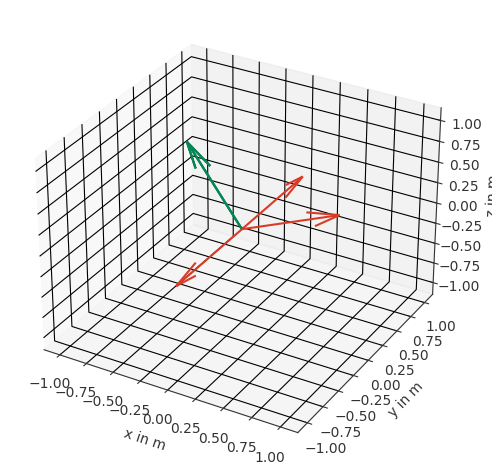

In [5]:
rotation = pf.Orientations.from_euler('y', 30, degrees=True)
orientations_rot = orientations * rotation
orientations_rot.show(show_rights=False)


# License notice
This notebook © 2024 by [the pyfar developers](https://github.com/orgs/pyfar/people) is licensed under [CC BY 4.0](http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1)

![CC BY Large](../../resources/cc-by.svg)


# Watermark

In [6]:
%load_ext watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.10.17
IPython version      : 8.37.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1029-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

pyfar: 0.7.3
numpy: 2.2.6

